# Principal Component Analysis
## Introduction

Principal Component Analysis (PCA) is a dimensionality-reduction method that is typically used to transform a high-dimensional data set into a smaller-dimensional subspace prior to applying a machine learning algorithm on the data.


Let $\mathbf{x^i} = \left[ x_1^i, x_2^i, \cdots, x_M^i \right]$ be a M-dimensional vector describing the $i$-th sample. The entire dataset of $N$ samples can be expressed as a $N \times M$ matrix $X$, whose rows are the samples:

\begin{align}
X &= \left(
\begin{array}{cccc}
x_1^1 & x_2^1  & \ldots & x_M^1  \\
x_1^2 & x_2^2  & \ldots & x_M^2  \\
\vdots & \vdots & \ddots & \vdots \\
x_1^N & x_2^N  & \ldots & x_M^N
\end{array} \right) 
\end{align}

PCA aims to transform the original data in order to maximise its variance. In practice, the new representation of the data $Y$ is linearly related to the original one:

\begin{equation} 
Y = X \cdot V
\end{equation}

The columns of $V$, $\{ \mathbf{v}_1, \cdots , \mathbf{v}_M \}$ are the principal components (PCs) of $X$, and correspond to the eigenvectors of the covariance matrix of $X$, which is defined as:

\begin{equation}
\text{cov} (X)= \frac{1}{N} \sum_n^{N} (x_n - \mu_x) \, (x_n - \mu_x)
\end{equation}

The covariance matrix, $\text{cov} (X)$, describes all relationships between pairs of measurements in our dataset $X$.

Because the covariance matrix is symmetric, the eigenvectors form an orthogonal set. The PCs (eigenvectors) correspond to the direction (in the original n-dimensional space) with the greatest variance in the data. Each eigenvector has a corresponding eigenvalue, indicating how much variance there is in the data along the corresponding eigenvector (or PC).

The dimensionality reduction can be performed by removing the PCs with the lowest eigenvalues, thus throwing away redundant features with low information content.


## Tutorial 1: creating PCA function

In order to get better insight into PCA, we will create a Python script for PCA from scratch and then apply it on a simple toy data.

<b>NOTE</b>: it is important to run all the steps (code cells) below to ensure correct execution.

First, the following codes is necessary to import the useful part of Python tools and libraries:

In [1]:
!git clone https://github.com/reinimaurer1/ML-CSC-tutorial tut
!mv tut/data data
import numpy as np
import math
import random
import matplotlib.pyplot as plt # This imports matplotlib library for plotting

First we define the PCA function:

In [2]:
def PCA(X):
    
    # computes the covariance of X
    # numpy covariance function assumes different ordering, so we transpose X
    XCov = np.cov(X.T)
    
    # solves the eigenproblem and stores eigvals in D and eigvecs in V
    D, V = np.linalg.eig(XCov)
    
    # perform the linear transformation - matrix-matrix multiplication
    Yn = np.dot(X,V)

    # return the eigenvector matrix V, the transformed data Yn, and the eigenvalues D
    return V,Yn,D

## Tutorial 2: understanding PCA on a simple toy data

Now, we will apply PCA function to a simple toy data set.

It is crucial to normalize the original data before applying PCA. In the data, some variables (columns of X) may have overall large values while others may be smaller. Without normalization, the variables with large values will be dominating the first PCs.

Z-score, one of popular normalization methods, converts all variables to a common scale with an average of zero and standard deviation of one.
Z-score is defined mathematically as $\text{zscore}(x) = (x-\mu_x)/\sigma_x$ where $x$ is a column of the dataset $X$.

In [3]:
# We define normalization function here, that is zscore function
# It is also known as standard score
def zscore(X): # z-score uses to normalise the data.
    
    # get the shape of the data matrix
    [nX,mX] = X.shape
    
    # compute the mean of every column X
    XMean = np.mean(X, axis=0)
    
    # compute standard deviation of each column
    XStd = np.std(X,axis=0,ddof=1)
    
    # subtract the mean from each column
    zX = X - np.kron(np.ones((nX,1)),XMean) # Z = [X - mX]
    
    # divide by the stdv
    Zscore = np.divide(zX,XStd)
    
    return Zscore

Next, we create some toy data and normalize it using <i>zscore</i>.
For simplicity, we create a set of points in the plane, roughly arranged as an ellipse.

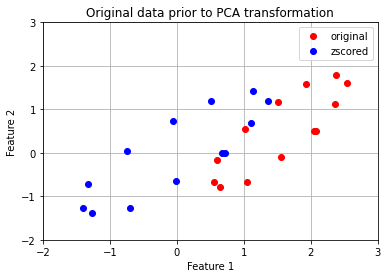

In [4]:
# Make an array of 13 angle values, from 0 to 2PI, at regular intervals
t = np.linspace(0, 2*np.pi, 13) 

# set some parameters of the ellipse
A = 1
B = 1.3
x0 = 1.5
y0 = 0.5
angle = -45

# compute x and y coordinates from the angles and parameters
x = A*np.cos(t+angle)+x0 + 0.05*np.random.uniform(-1.0,1.0,t.size)
y = B*np.sin(t)+y0 + 0.05*np.random.uniform(-1.0,1.0,t.size)
# put the x and y arrays into a matrix format
Xdata=np.column_stack([x,y])

# Next, we normalize the data
X = zscore(Xdata) 

# Plot the original data first (normalized)
plt.figure(1)
plt.plot(Xdata[:,0],Xdata[:,1],'ro', label='original') # re-plot the data
plt.plot(X[:,0],X[:,1],'bo',label='zscored') # re-plot the data
plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')

plt.title('Original data prior to PCA transformation')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.ylim(bottom=-2.0, top=3.0)
plt.xlim(left=-2, right=3)
plt.grid()
plt.show()

Then, we apply <i>PCA</i> function to the data and print eigenvalues associated with two PCs. The results indicate that the highest variance is held in the first PC with variance of ~1.83 while the second PC has variance of ~0.16.

In [ ]:
# Applying PCA
V,Ypca,D = PCA(X)            # perform PCA, where V, Ypca and D are
                             # eigenvectors, new transformation and eigenvalues,
                             # respectively
print("Eigenvalues D: %s" % D)

PCA transforms the original data space to PC space where the highest information is held by the first PC. PCA will be extremely beneficial when we deal with high dimensional data sets, so we can discard unneccesary PCs which contain very low variance. 
This type of problem will be tested on real chemical data in the final tutorial.
The following code is to plot the original data together with the new transformation data as well
as their eigenvector (PCs) as the direction. The produced Figure demonstrates how the original data (blue
dots) rotate to form new transformation data (red dots).

In [ ]:
# We re-plot the original Figure
plt.figure(1)
plt.plot(X[:,0],X[:,1],'bo', label='zscored data') # re-plot the data
plt.xlabel('X1')
plt.ylabel('X2')

plt.plot(Ypca[:,0],Ypca[:,1],'ro', label='PCA transformed')
plt.title('After PCA transformation')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.ylim(bottom=-2.0, top=2.0)
plt.xlim(left=-2, right=2)
plt.legend()
plt.grid()
plt.show()

## Exercise 1: dimensionality reduction on wine chemical data

In this tutorial we will use real experimental data, representing the chemical composition of about 178 wine samples, from three different cultivars in the same region in Italy.
For each wine, the analysis determined the quantities of 13 constituents, listed below:

<table>
  <tr>
    <th>Feature No.</th>
    <th>Wine Chemical Composition</th> 
  </tr>
  <tr>
    <td>1</td>
    <td>Alcohol</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Malic acid</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Ash</td>
  </tr>
  <tr>
    <td>4</td>
    <td>Alcalinity of ash</td>
  </tr>
  <tr>
    <td>5</td>
    <td>Magnesium</td>
  </tr>
  <tr>
    <td>6</td>
    <td>Total phenols</td>
  </tr>
  <tr>
    <td>7</td>
    <td>Flavanoids</td>
  </tr>
  <tr>
    <td>8</td>
    <td>Nonavanoid phenols</td>
  </tr>
  <tr>
    <td>9</td>
    <td>Proanthocyanins</td>
  </tr>
  <tr>
    <td>10</td>
    <td>Color intensity</td>
  </tr>
  <tr>
    <td>11</td>
    <td>Hue</td>
  </tr>
  <tr>
    <td>12</td>
    <td>OD280/OD315 of diluted wines</td>
  </tr>
  <tr>
    <td>13</td>
    <td>Proline</td>
  </tr>
  <caption>Wine chemical composition*
  
  *Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science</caption>
</table><br>

The data file <i>./data/wineInputs.txt</i> contains 178 lines, each with the 13 entries representing the wine chemical composition (descriptor). The file  <i>./data/wineOutputs.txt</i> contains the type of each wine: either 1, 2 or 3.

In this tutorial, the objective is to reduce the dimensionality of the descriptors by identifying and eliminating the redundant ones with PCA. 

Fill in the missing code based on the previous examples.
This tutorial will be used later for the exercise on the following topics (Kmeans, KNN and Neural Network).

In [ ]:
# First, we load input/output data from the files
dataIn = np.genfromtxt('./data/wineInputs.txt', delimiter=',')
dataOut = np.genfromtxt('./data/wineOutputs.txt', delimiter=',')

## # Apply normalization
# ...

## # Apply PCA
# ...


# Here, we try to obtain the normalized cumulative sum (cumsum) of eigenvalues
# assuming D are the eigenvalues from PCA
idc = np.divide(np.cumsum(D),np.sum(D)) 

# We plot normalized cumulative sum to understand the contributions of the obtained PCs
plt.title('Normalized cumulative sum')
plt.xlabel('# principal components')
plt.ylabel('cumulative sum')

plt.plot(range(1,len(D)+1),idc,'bo') # re-plot the data

plt.grid()
plt.show()